In [100]:
import networkx as nx

g = nx.erdos_renyi_graph(1000, 0.1)

In [101]:
import ndlib.models.epidemics as ep

model = ep.SIRModel(g)

In [102]:
import json
print(json.dumps(model.parameters, indent=2))

{
  "model": {
    "beta": {
      "descr": "Infection rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "gamma": {
      "descr": "Recovery rate",
      "range": [
        0,
        1
      ],
      "optional": false
    },
    "tp_rate": {
      "descr": "Whether if the infection rate depends on the number of infected neighbors",
      "range": [
        0,
        1
      ],
      "optional": true,
      "default": 1
    }
  },
  "nodes": {},
  "edges": {}
}


In [103]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}

In [104]:
num_nodes = g.number_of_nodes()
num_edges = g.number_of_edges()
degrees = [deg for node, deg in g.degree()]
avg_degree = 2 * num_edges / num_nodes if num_nodes > 0 else 0
# Average squared degree
avg_squared_degree = sum(deg**2 for deg in degrees) / num_nodes if num_nodes > 0 else 0
b_threshold = avg_degree/(avg_squared_degree-avg_degree)
beta = b_threshold*1.9
beta

0.01906439880093618

In [105]:
import ndlib.models.ModelConfig as mc

config = mc.Configuration()
config.add_model_parameter('beta', beta) # infection rate
config.add_model_parameter('gamma', 0.01) # recovery rate

In [106]:
g.number_of_edges()

49894

In [107]:

# initial_status = {node: 1 if node in [0] else 0 for node in g.nodes()}
config.add_model_initial_configuration("Infected", {0: 1})

In [108]:

model.set_initial_status(config)

In [109]:
iterations = model.iteration_bunch(200, node_status=True)
iterations

[{'iteration': 0,
  'status': {0: 1,
   1: 0,
   2: 0,
   3: 0,
   4: 0,
   5: 0,
   6: 0,
   7: 0,
   8: 0,
   9: 0,
   10: 0,
   11: 0,
   12: 0,
   13: 0,
   14: 0,
   15: 0,
   16: 0,
   17: 0,
   18: 0,
   19: 0,
   20: 0,
   21: 0,
   22: 0,
   23: 0,
   24: 0,
   25: 0,
   26: 0,
   27: 0,
   28: 0,
   29: 0,
   30: 0,
   31: 0,
   32: 0,
   33: 0,
   34: 0,
   35: 0,
   36: 0,
   37: 0,
   38: 0,
   39: 0,
   40: 0,
   41: 0,
   42: 0,
   43: 0,
   44: 0,
   45: 0,
   46: 0,
   47: 0,
   48: 0,
   49: 0,
   50: 0,
   51: 0,
   52: 0,
   53: 0,
   54: 0,
   55: 0,
   56: 0,
   57: 0,
   58: 0,
   59: 0,
   60: 0,
   61: 0,
   62: 0,
   63: 0,
   64: 0,
   65: 0,
   66: 0,
   67: 0,
   68: 0,
   69: 0,
   70: 0,
   71: 0,
   72: 0,
   73: 0,
   74: 0,
   75: 0,
   76: 0,
   77: 0,
   78: 0,
   79: 0,
   80: 0,
   81: 0,
   82: 0,
   83: 0,
   84: 0,
   85: 0,
   86: 0,
   87: 0,
   88: 0,
   89: 0,
   90: 0,
   91: 0,
   92: 0,
   93: 0,
   94: 0,
   95: 0,
   96: 0,
   97: 0,
  

In [110]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [999,
     997,
     990,
     971,
     910,
     785,
     518,
     200,
     42,
     6,
     1,
     1,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
     0,
    

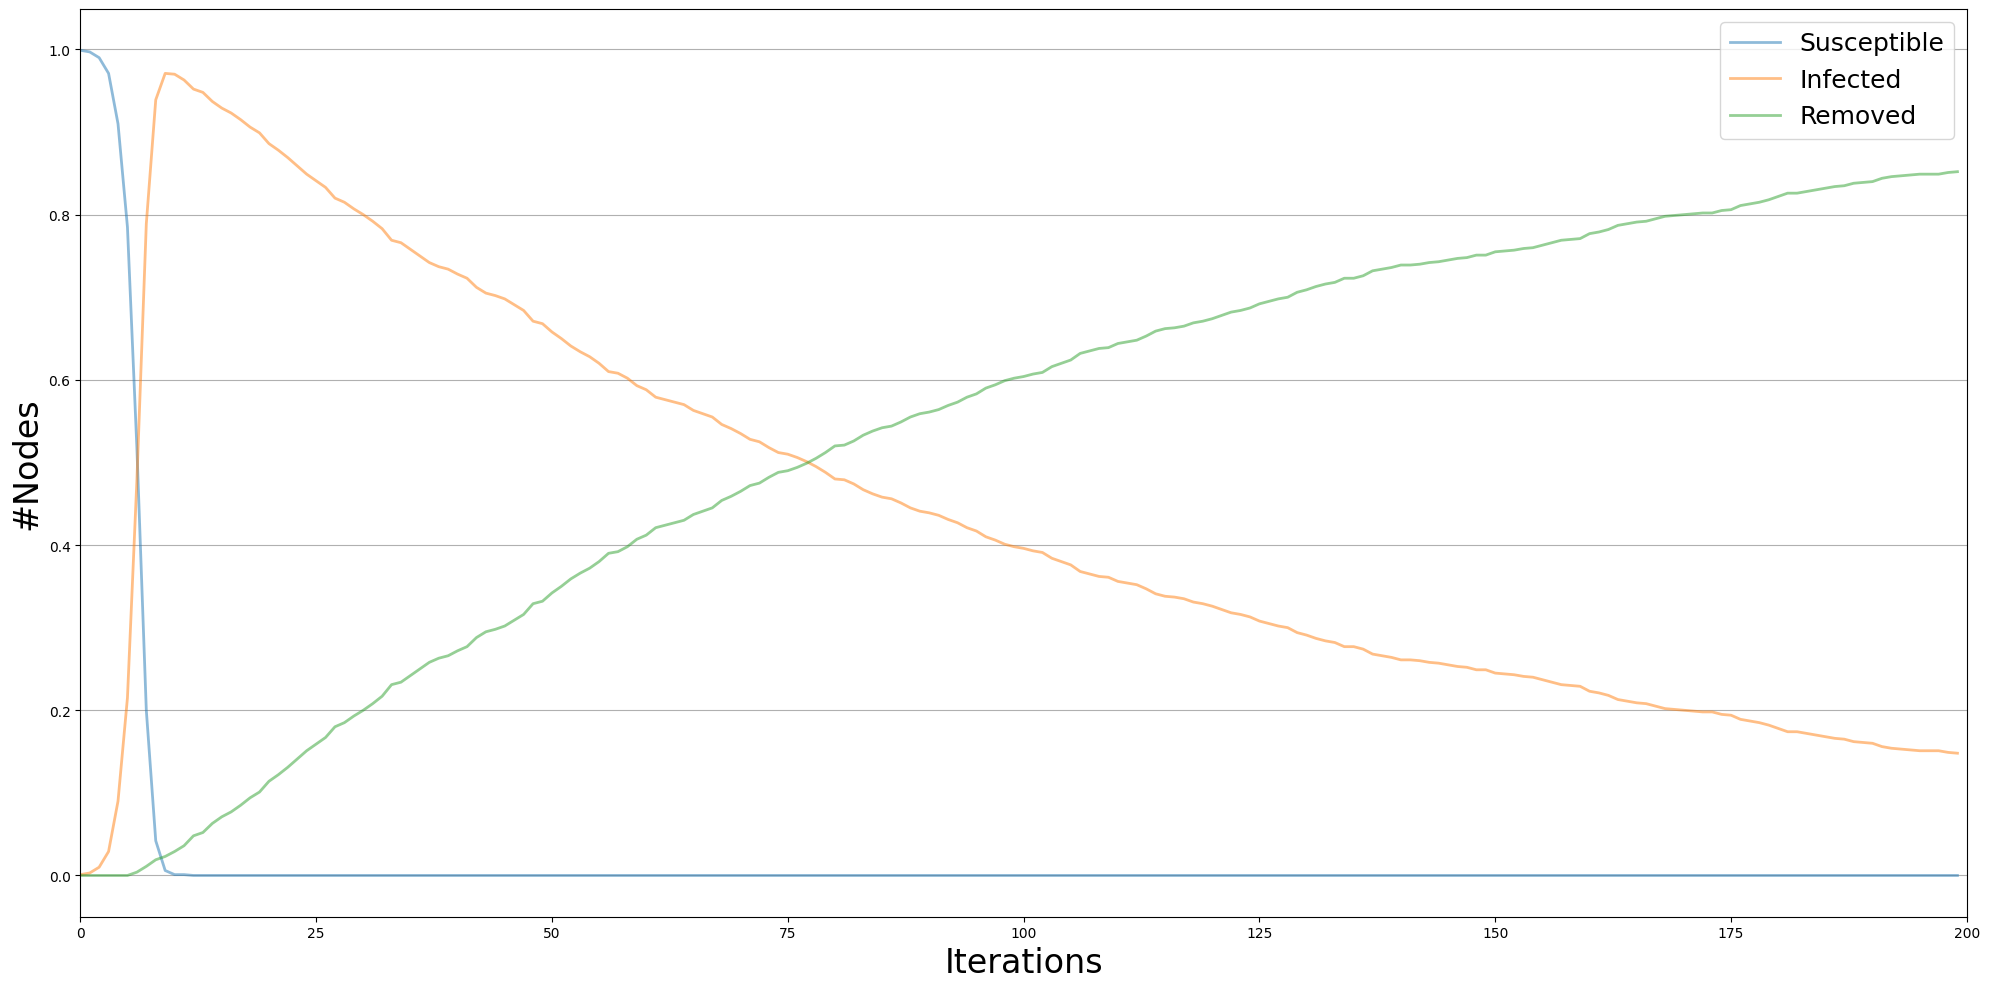

In [111]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()